In [32]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')    # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Kishor@2003',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/kishor/OneDrive/Documents/GitHub pro/Ecommerce/Ecommrece-kaggle-datasets'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Kishor@2003",
                             database = "ecommerce")
cur = db.cursor()



In [2]:
#q1.List all unique cities where customers are located.
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [3]:
#Count the number of orders placed in 2017.
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

data


[(90202,)]

In [8]:
#Calculate the percentage of orders that were paid in installments.
query = """ select (sum(case when payment_installments >= 1 then 1
            else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

data
print('the percentage of orders that were paid in installments is',data[0][0])

the percentage of orders that were paid in installments is 99.9981


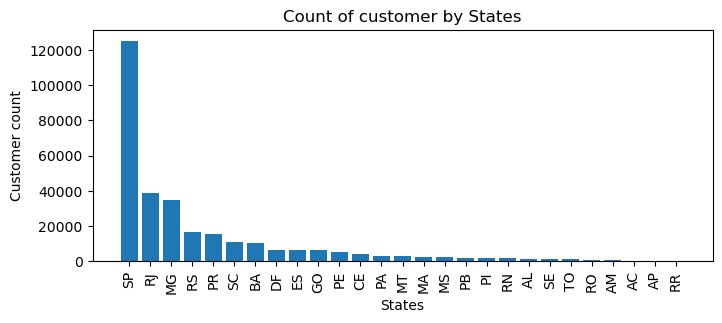

In [43]:
#Count the number of customers from each state.
query = """ select customer_state,count(customer_id)
            from customers
            group by customer_state
            """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["State","customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["State"],df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Customer count")
plt.title("Count of customer by States")
plt.show()

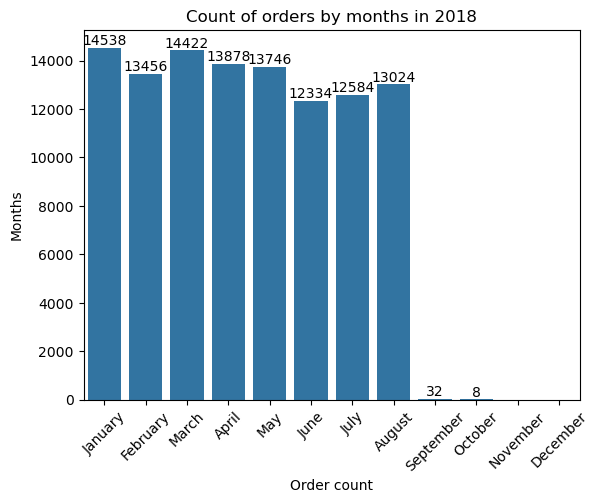

In [45]:
# Calculate the number of orders per month in 2018.
query = """ select monthname(order_purchase_timestamp) months,
            count(order_id) order_count
            from orders where year(order_purchase_timestamp)=2018
            group by months"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
'''print(data)
print(df)'''

o = ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]


ax=sns.barplot(x="months",y="order_count",data=df,order=o)


plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.xlabel("Order count")
plt.ylabel("Months")
plt.title("Count of orders by months in 2018")
plt.show()


In [52]:
#Find the average number of products per order, grouped by customer city.
query = """ SELECT 
    customers.customer_city,
    ROUND(AVG(t.oc), 2) AS average_orders
FROM customers
LEFT JOIN (
    SELECT 
        orders.order_id,
        orders.customer_id,
        COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items
        ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
) t
ON customers.customer_id = t.customer_id
GROUP BY customers.customer_city;"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city","average products/order"])
df.head(10)


,customer city,average orders
0,franca,None
1,sao bernardo do campo,None
2,sao paulo,None
3,mogi das cruzes,None
4,campinas,None
5,jaragua do sul,None
6,timoteo,None
7,curitiba,None
8,belo horizonte,None
9,montes claros,None
